# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

What is customer billing statement?
A billing statement — also called an account statement — is a document that lists all of a client's charges over a given time. It shows your client how much they have been billed and when.

In [ ]:
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,roc_auc_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,cross_val_score

In [ ]:
# For ignoring all the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls')

In [ ]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

# **Null Value Treatment**

In [ ]:
df.isna()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,11,11,22724,22347,22027,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


# **Feature engineering**

In [ ]:
df.columns = df.iloc[0]
df.drop(labels= 0, axis = 0, inplace = True)

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df.rename(columns = {'SEX':'GENDER'}, inplace = True)

In [ ]:
df.rename(columns = {'PAY_0':'rePAY_1','PAY_2':'rePAY_2','PAY_3':'rePAY_3','PAY_4':'rePAY_4','PAY_5':'rePAY_5','PAY_6':'rePAY_6'}, inplace = True)

In [ ]:
df

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# This will convert Dtypes object to int
df = df.astype({'LIMIT_BAL':'int'})
df = df.astype({'GENDER':'int'})
df = df.astype({'EDUCATION':'int'})
df = df.astype({'MARRIAGE':'int'})
df = df.astype({'AGE':'int'})
df = df.astype({'rePAY_1':'int'})
df = df.astype({'rePAY_2':'int'})
df = df.astype({'rePAY_3':'int'})
df = df.astype({'rePAY_4':'int'})
df = df.astype({'rePAY_5':'int'})
df = df.astype({'rePAY_6':'int'})
df = df.astype({'BILL_AMT1':'int'})
df = df.astype({'BILL_AMT2':'int'})
df = df.astype({'BILL_AMT3':'int'})
df = df.astype({'BILL_AMT4':'int'})
df = df.astype({'BILL_AMT5':'int'})
df = df.astype({'BILL_AMT6':'int'})
df = df.astype({'PAY_AMT1':'int'})
df = df.astype({'PAY_AMT2':'int'})
df = df.astype({'PAY_AMT3':'int'})
df = df.astype({'PAY_AMT4':'int'})
df = df.astype({'PAY_AMT5':'int'})
df = df.astype({'PAY_AMT6':'int'})
df = df.astype({'default payment next month':'int'})
print(df.dtypes)

0
LIMIT_BAL                     int64
GENDER                        int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
rePAY_1                       int64
rePAY_2                       int64
rePAY_3                       int64
rePAY_4                       int64
rePAY_5                       int64
rePAY_6                       int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
rePAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
rePAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
rePAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
rePAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
# Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

# **Dealing with Outliers**

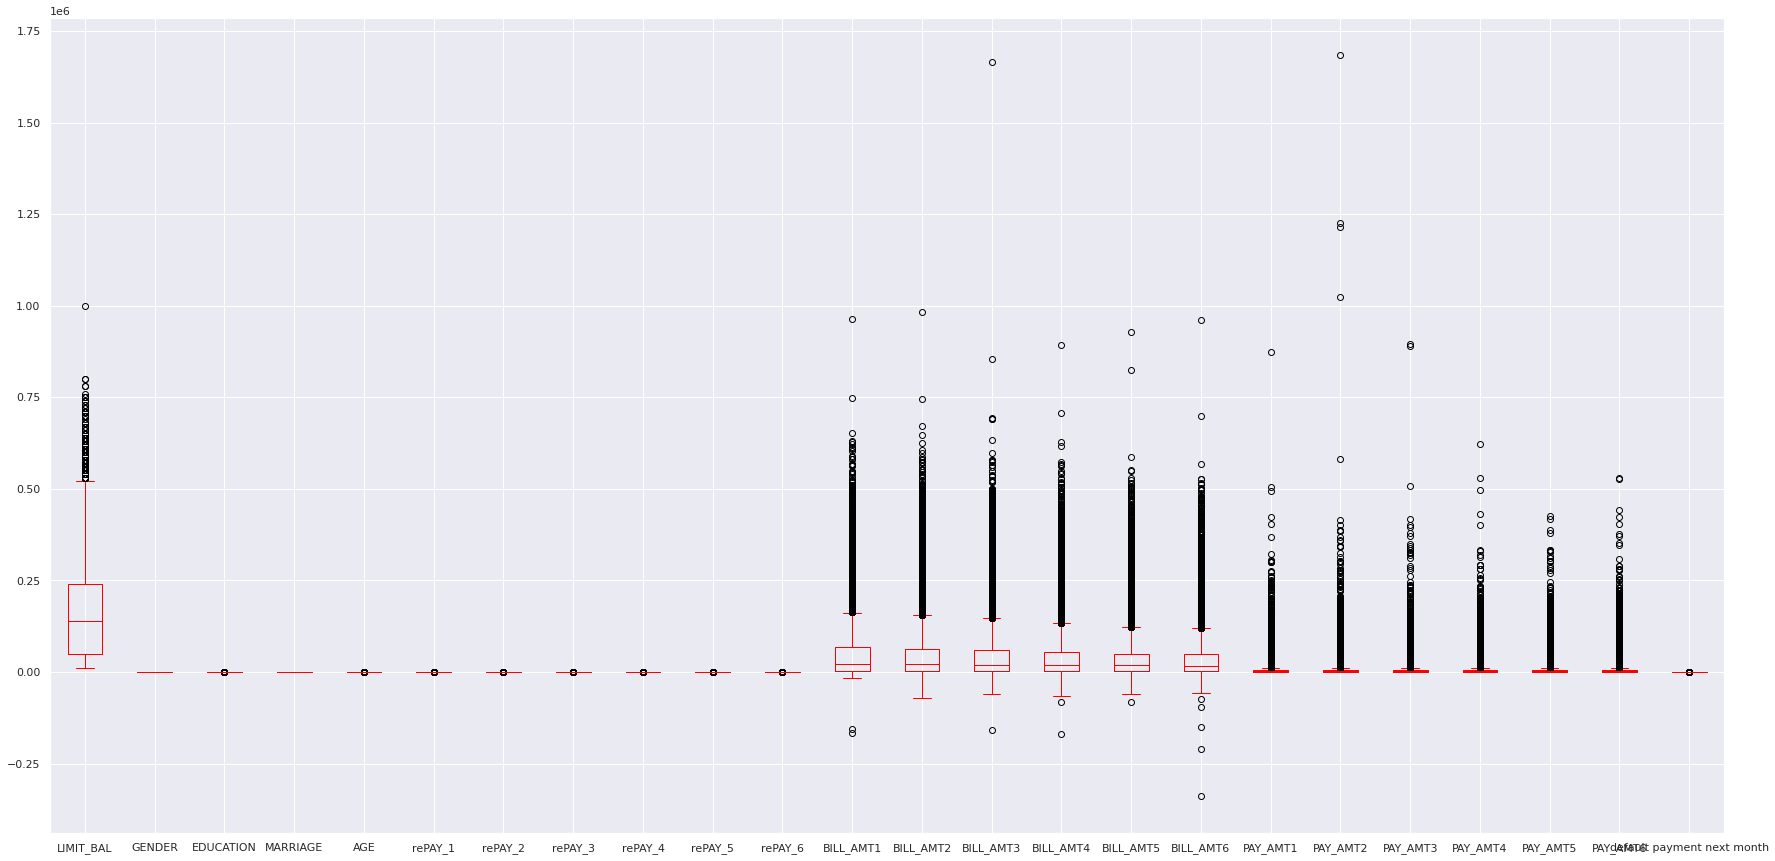

In [ ]:
plt.figure(figsize = (30, 15))
df.boxplot(color = 'red' )

# Beacuse of the Financial datasets I do not prefer to do outliers treatments on every features so trying to do it on some features that not really affects  

In [ ]:
# removing outliers with the IQR (Inter Quantile Range)method
for p in ['LIMIT_BAL']:
    q75,q25 = np.percentile(df.loc[:,p],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[p] < min,p] = np.nan
    df.loc[df[p] > max,p] = np.nan

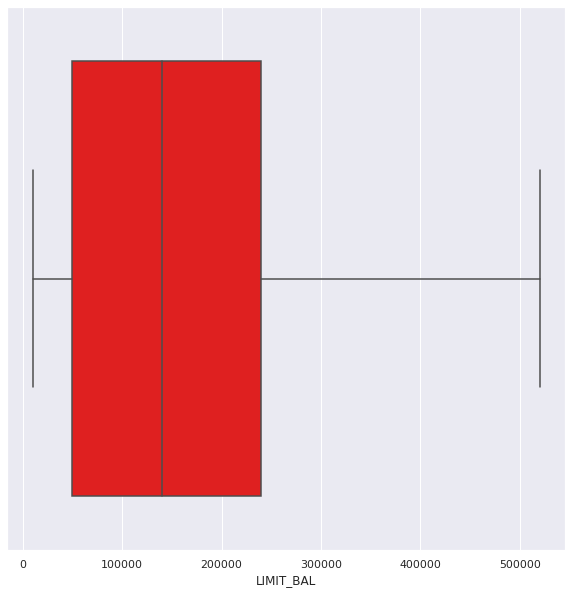

In [ ]:
plt.figure(figsize = (10, 10))
sns.boxplot(df['LIMIT_BAL'],color = 'red' )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29833 non-null  float64
 1   GENDER                      30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   rePAY_1                     30000 non-null  int64  
 6   rePAY_2                     30000 non-null  int64  
 7   rePAY_3                     30000 non-null  int64  
 8   rePAY_4                     30000 non-null  int64  
 9   rePAY_5                     30000 non-null  int64  
 10  rePAY_6                     30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  int64  
 12  BILL_AMT2                   30000 non-null  int64  
 13  BILL_AMT3                   300

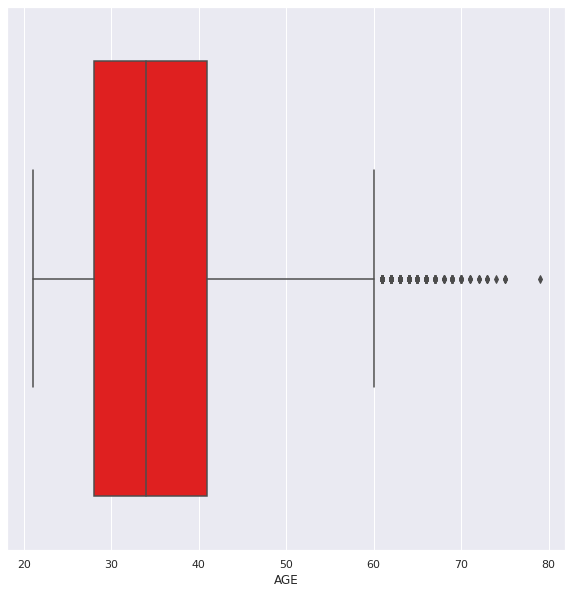

In [ ]:
plt.figure(figsize = (10, 10))
sns.boxplot(df['AGE'],color = 'red' )

In [ ]:
# Treating Age Column with Outliers
df=df[(df.AGE)<61]

In [ ]:
df=df[(df.AGE)<61]
df

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


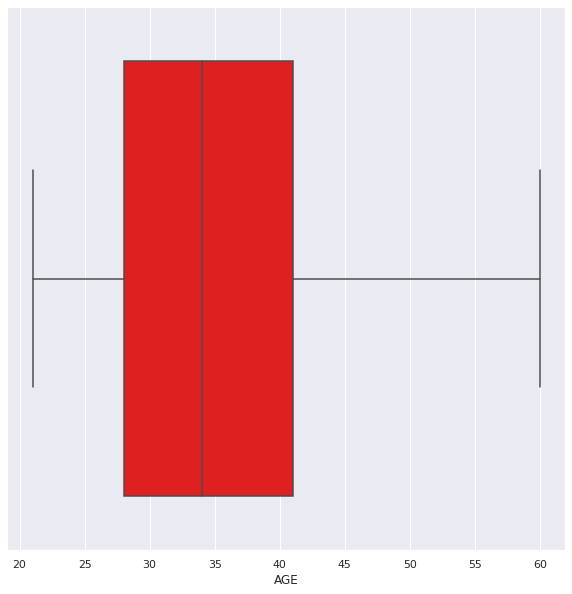

In [ ]:
plt.figure(figsize = (10, 10))
sns.boxplot(df['AGE'],color='red')

# **EDA**

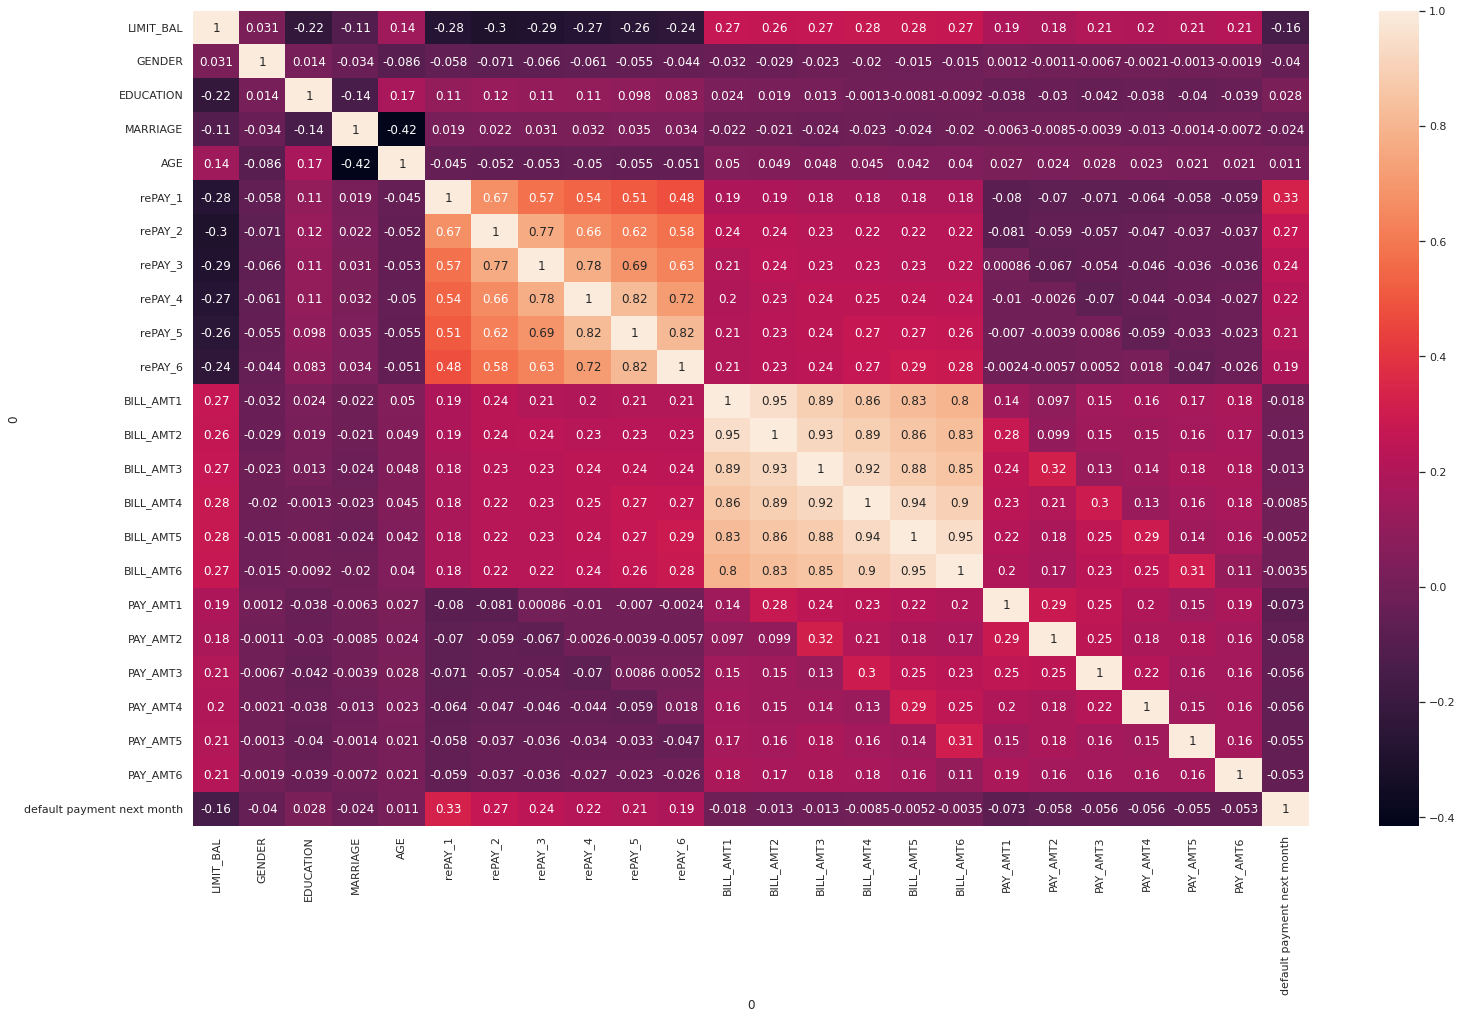

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

# As I have seen that BILL_AMT features are positively correlated with each other and also PAY_AMT features are positively correlated with each other

In [ ]:
df['Total_Bill'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

In [ ]:
df['Total_Pay_AMT'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']

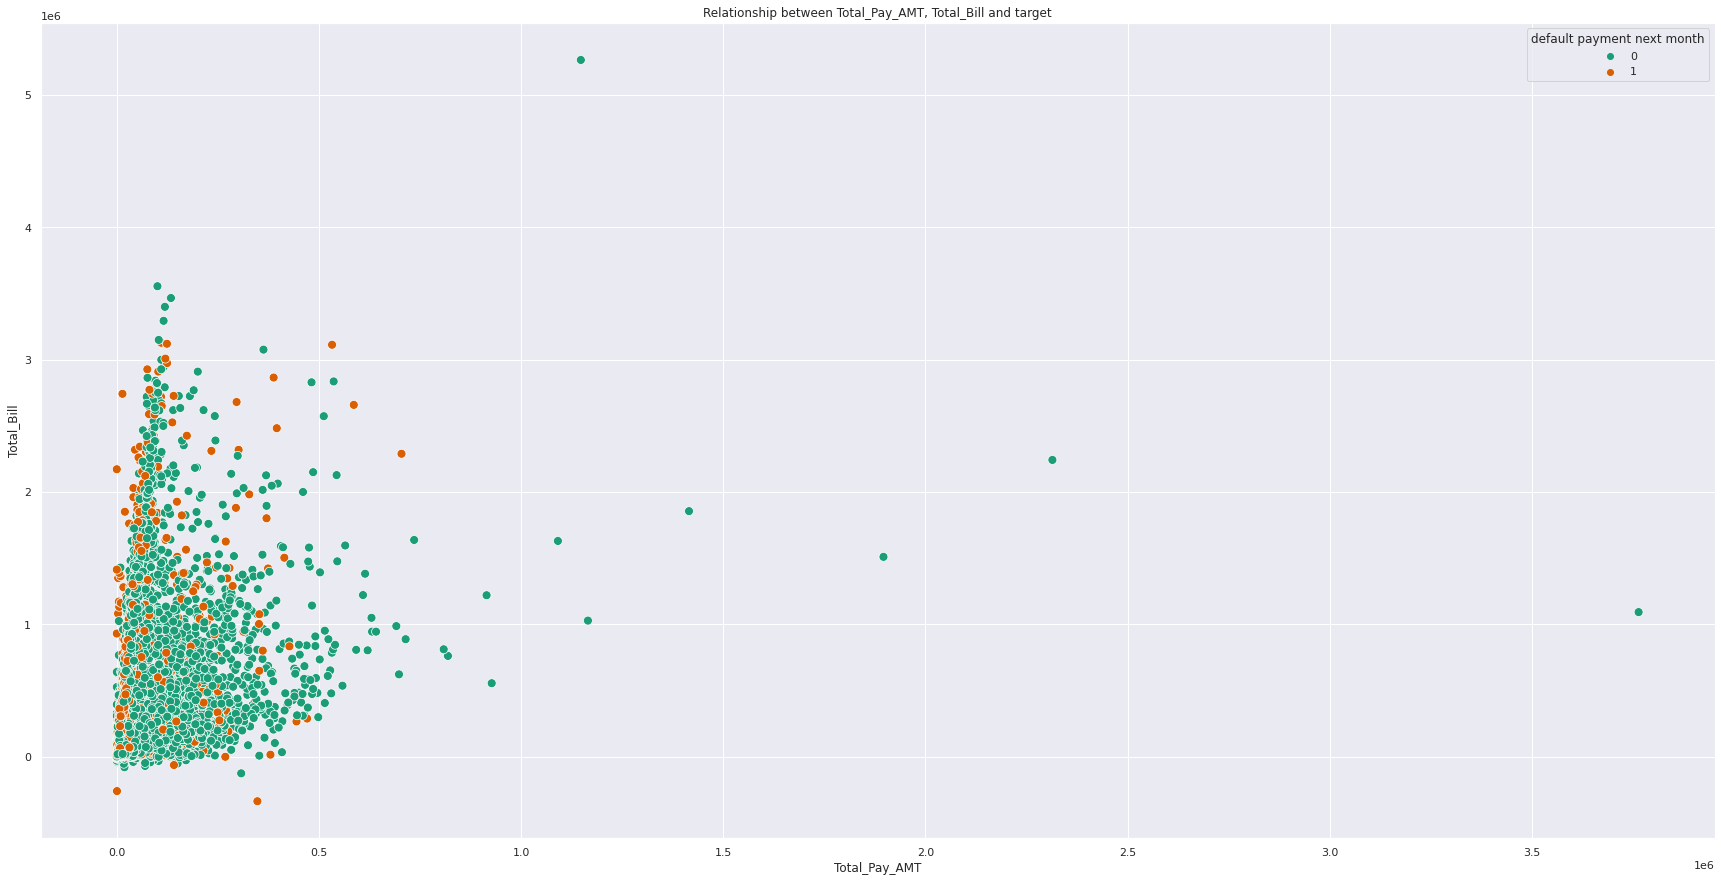

In [ ]:
plt.figure(figsize=(30,15))
sns.scatterplot(x="Total_Pay_AMT", y="Total_Bill", hue="default payment next month", data=df, palette="Dark2", s=80)
plt.title("Relationship between Total_Pay_AMT, Total_Bill and target")
plt.show()

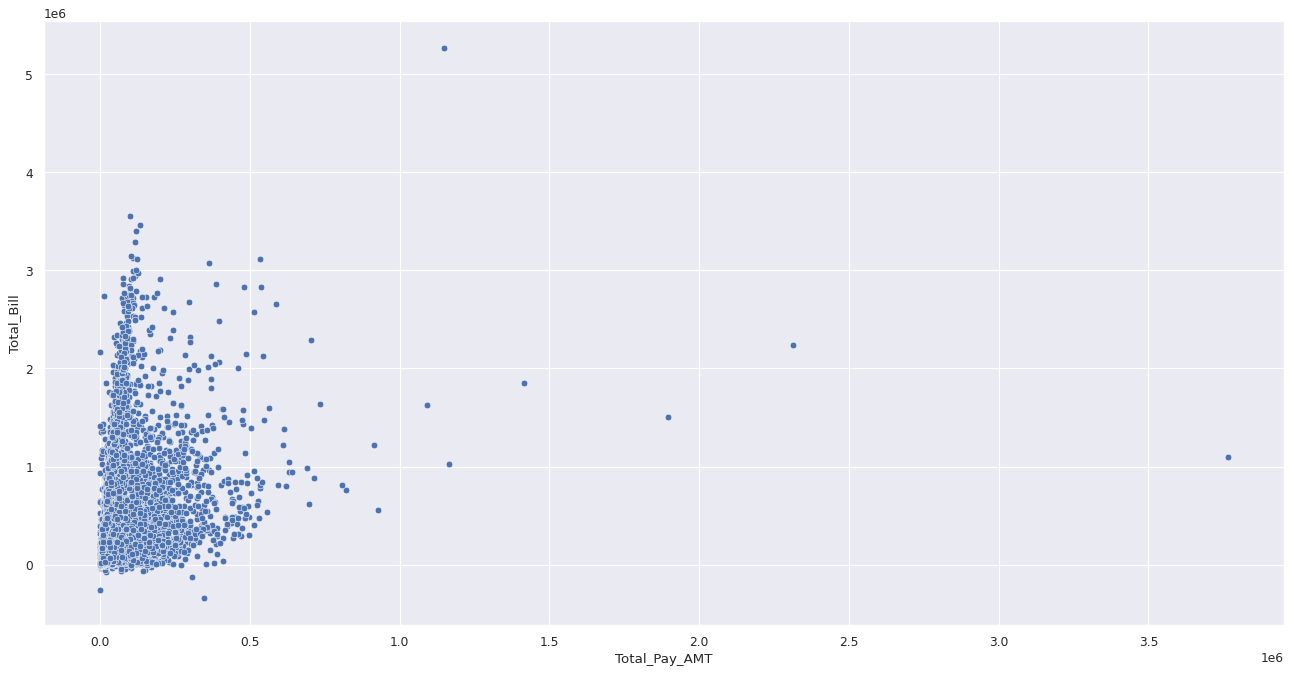

In [ ]:
plt.figure(figsize=(20,10), dpi=80)
sns.scatterplot(df["Total_Pay_AMT"],df['Total_Bill'],palette="Dark2")
plt.show()

Text(0.5, 1.0, 'Defaulters vs Not Defaulters')

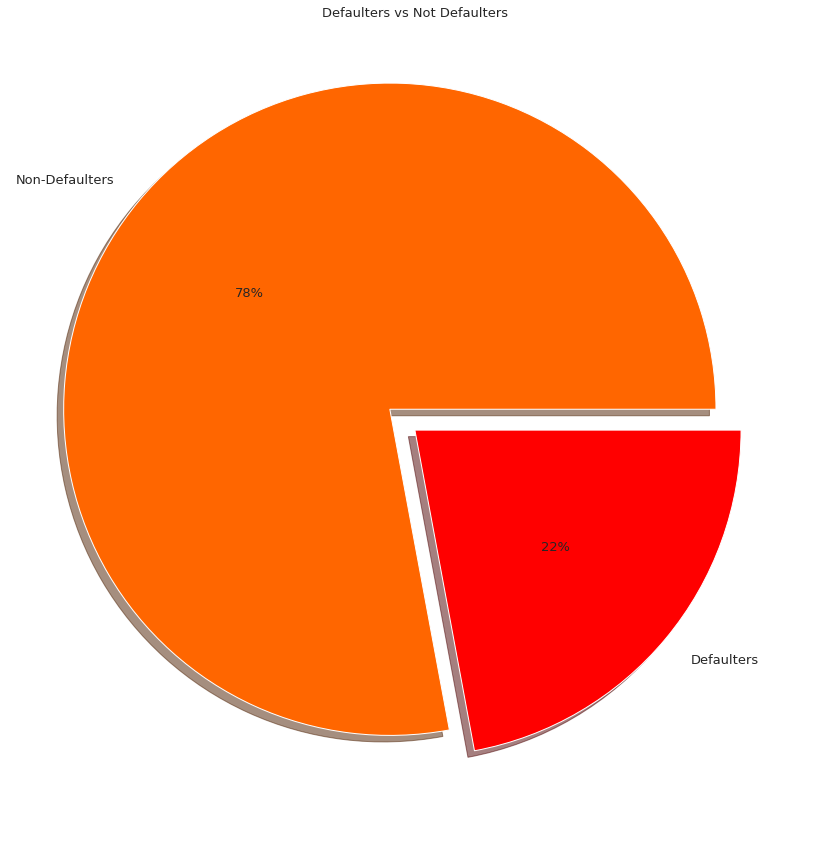

In [ ]:
# Creating a pie chart
plt.figure(figsize = (25,15))
plt.pie(df['default payment next month'].value_counts(),radius=1, autopct='%2.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['Non-Defaulters','Defaulters'],explode = [0.1, 0],
        shadow=True,colors=['#FF6600','#FF0000'])
plt.title('Defaulters vs Not Defaulters',fontdict={'size':13})

# **We can see that there are almost 78% of Non Defaulters and 22% are Only Defaulters**

# **Checking rePayments status**

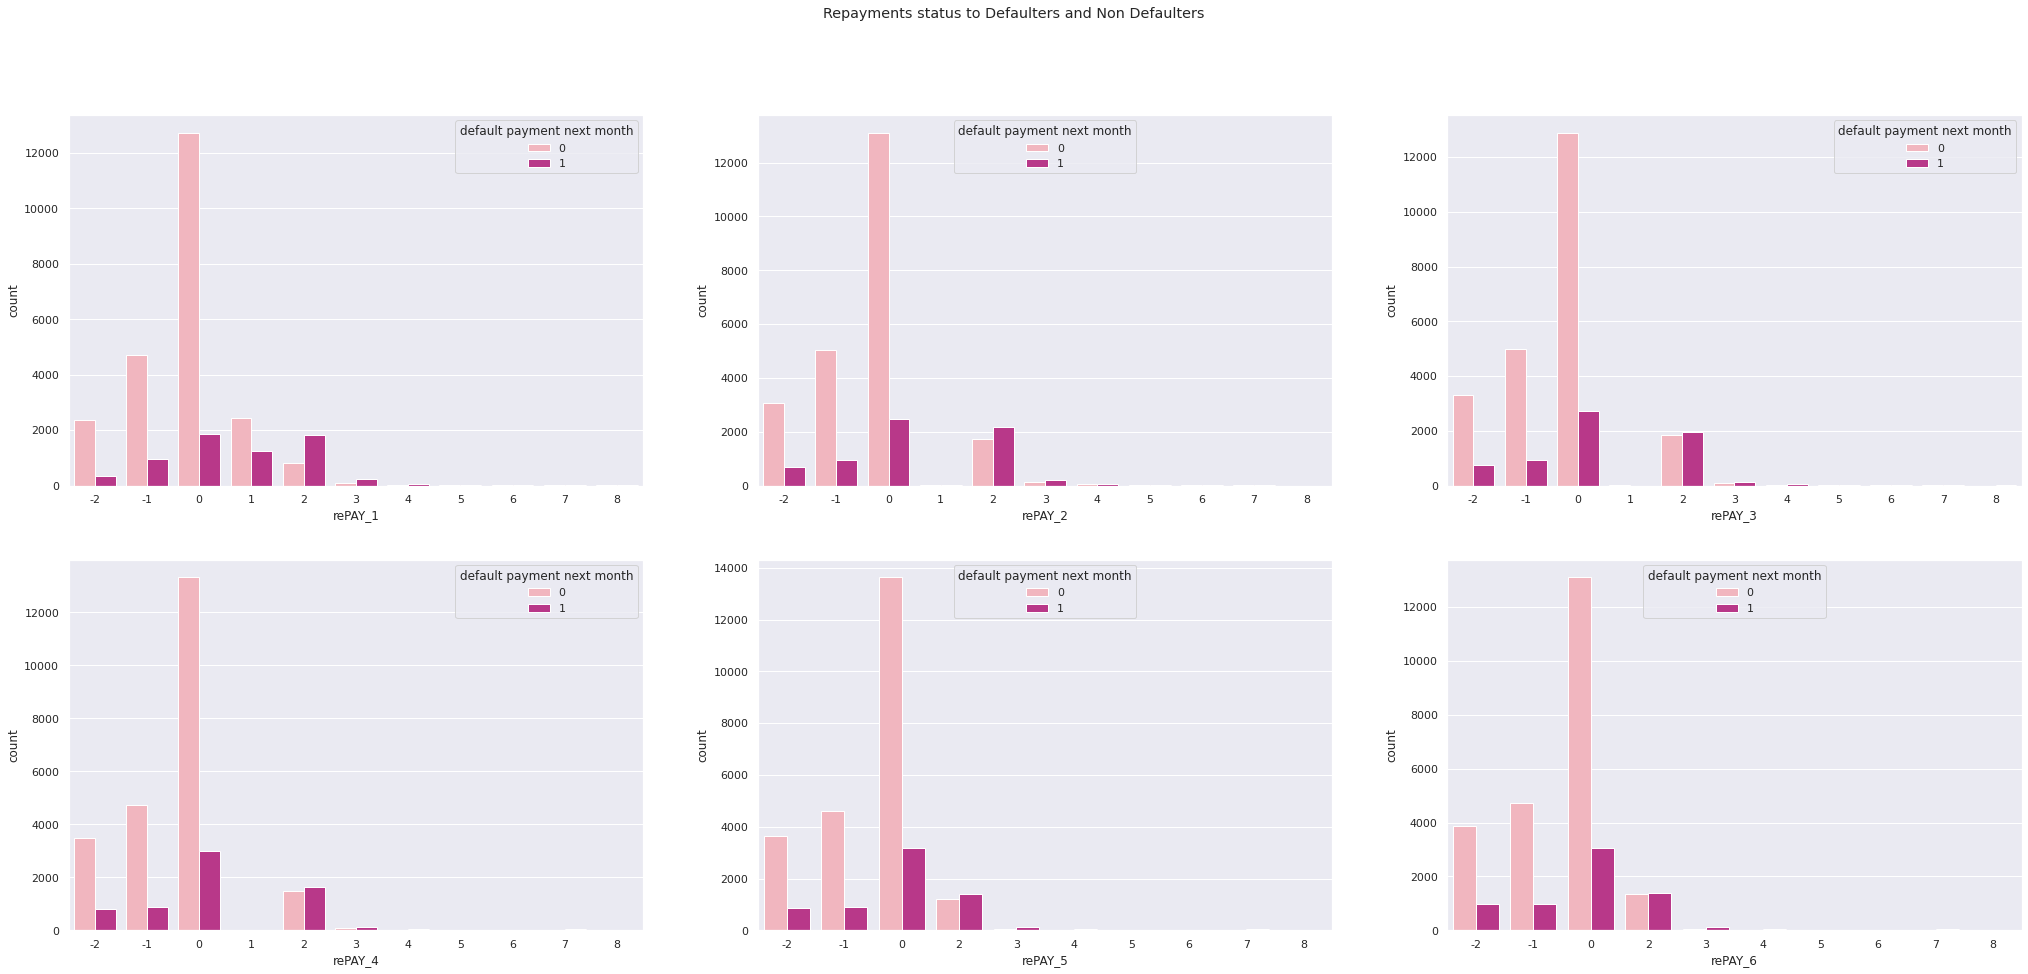

In [ ]:
# Creating a new dataframe for repayments status
repay_df = df[['rePAY_1', 'rePAY_2', 'rePAY_3', 'rePAY_4',
               'rePAY_5', 'rePAY_6','default payment next month']]

f, axes = plt.subplots(2, 3, figsize=(35, 15), facecolor='white')
f.suptitle('Repayments status to Defaulters and Non Defaulters')

fig_1 = sns.countplot(x="rePAY_1", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[0,0])
fig_2 = sns.countplot(x="rePAY_2", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[0,1])
fig_3 = sns.countplot(x="rePAY_3", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[0,2])
fig_4 = sns.countplot(x="rePAY_4", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[1,0])
fig_5 = sns.countplot(x="rePAY_5", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[1,1])
fig_6 = sns.countplot(x="rePAY_6", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[1,2]);

# **CHECK EDUCATION**

# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others).

In [ ]:
df.value_counts('EDUCATION')

EDUCATION
2    13949
1    10514
3     4800
5      279
4      123
6       49
0       14
dtype: int64

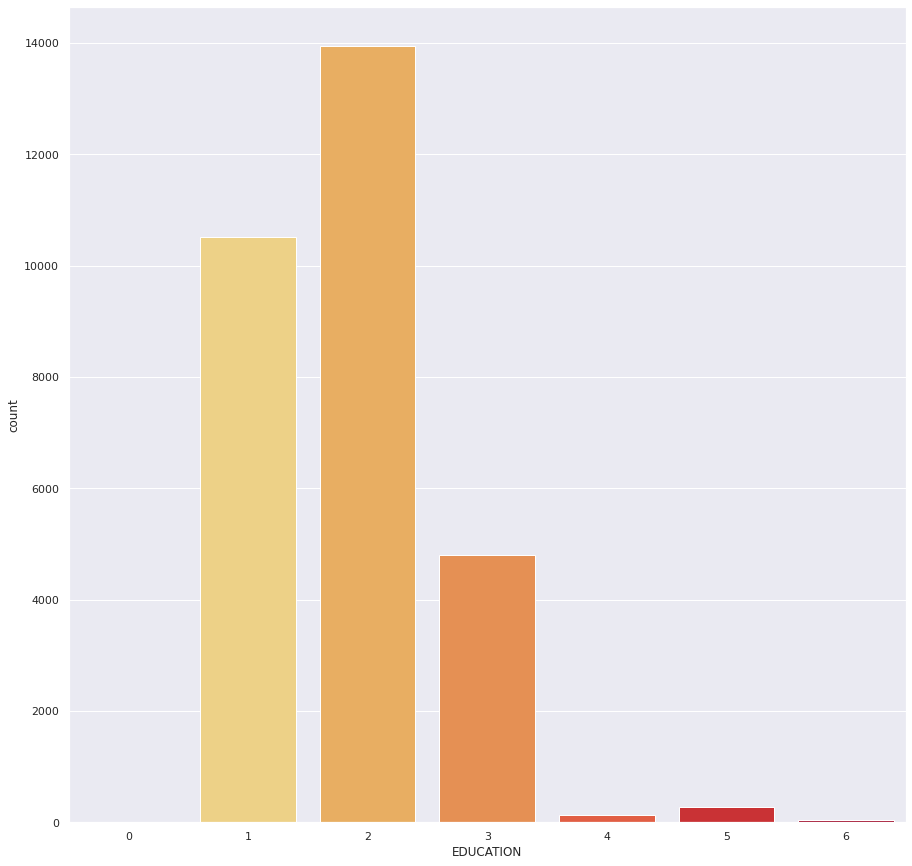

In [ ]:
sns.countplot('EDUCATION',data = df,palette="YlOrRd")
plt.rcParams['figure.figsize'] = (15, 15)

# In our Dataset there is 0,5,6 refers to nothing so I have merge this in 4 refers to others

In [ ]:
Merge = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[Merge, 'EDUCATION'] = 4

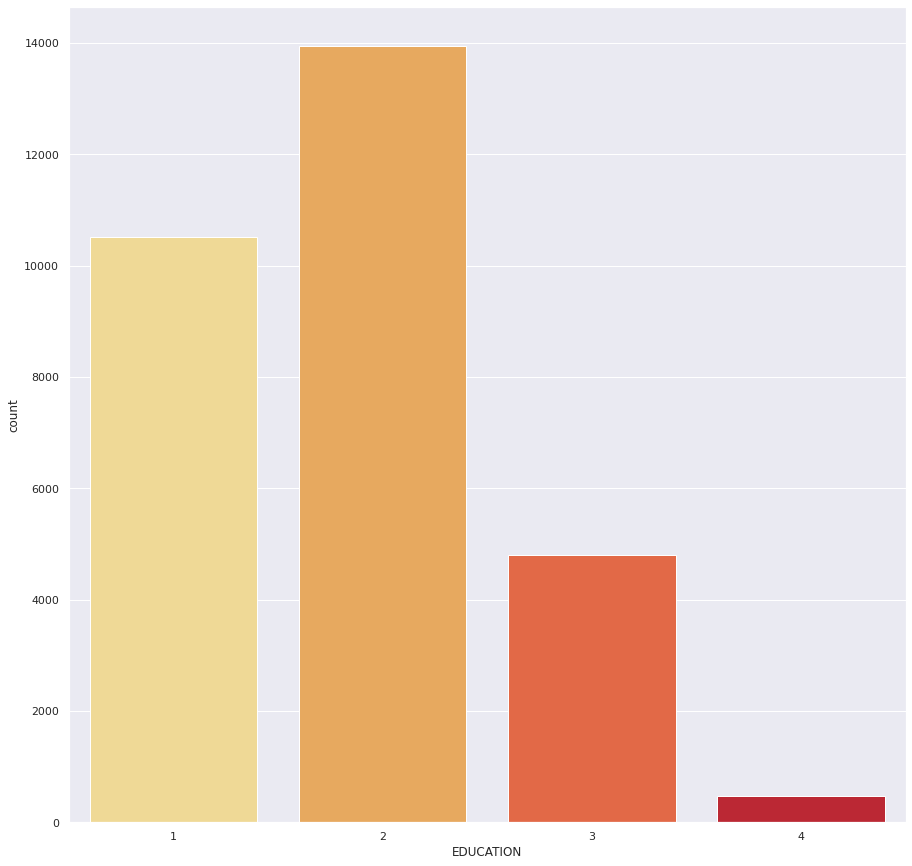

In [ ]:
sns.countplot('EDUCATION',data = df,palette="YlOrRd")
plt.rcParams['figure.figsize'] = (15, 15)

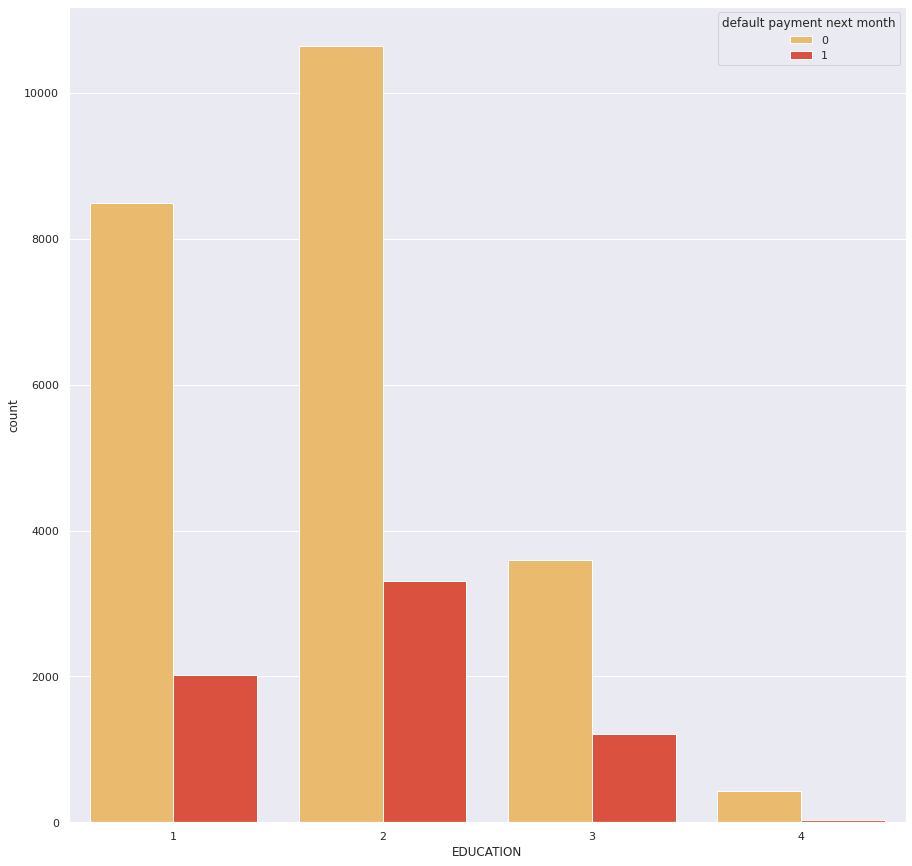

In [ ]:
sns.countplot(x=df['EDUCATION'],hue=df['default payment next month'],palette="YlOrRd")
plt.rcParams['figure.figsize'] = (25,10)

# I have seen university students had most of the entries in the dataset
# Also most of the university students are going to be Defaults

Text(0.5, 0, 'EDUCATION WISE LIMIT BALANCE')

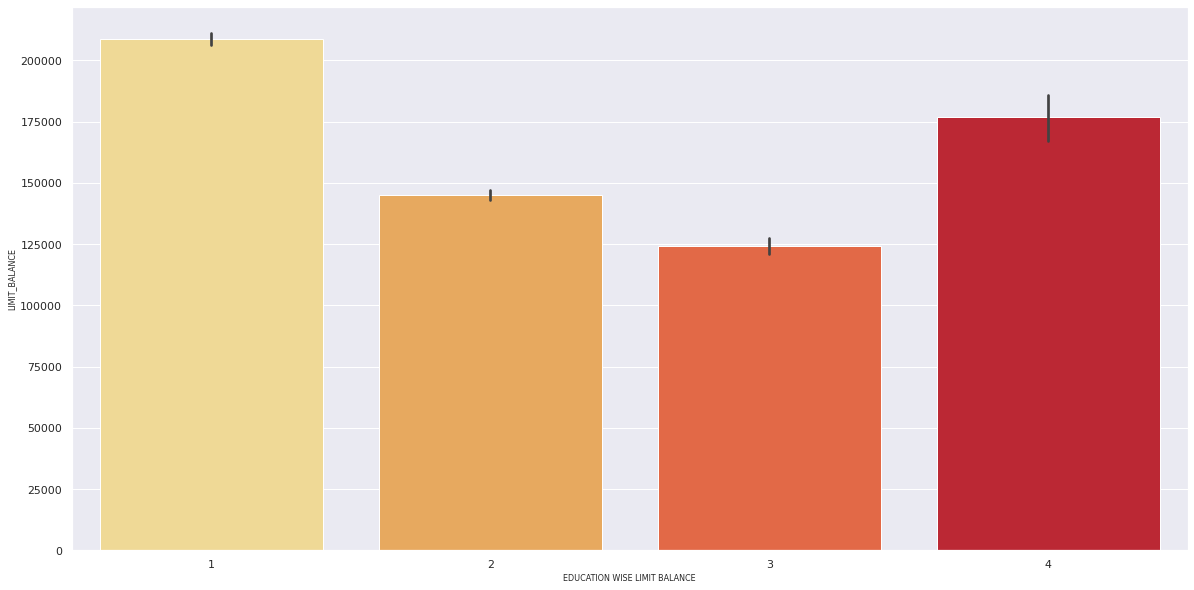

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['EDUCATION'],df['LIMIT_BAL'],palette ='YlOrRd')
plt.ylabel('LIMIT_BALANCE',fontdict={'fontsize':8})
plt.xlabel('EDUCATION WISE LIMIT BALANCE',fontdict={'fontsize':8})

Text(0.5, 0, 'EDUCATION WISE LIMIT BALANCE')

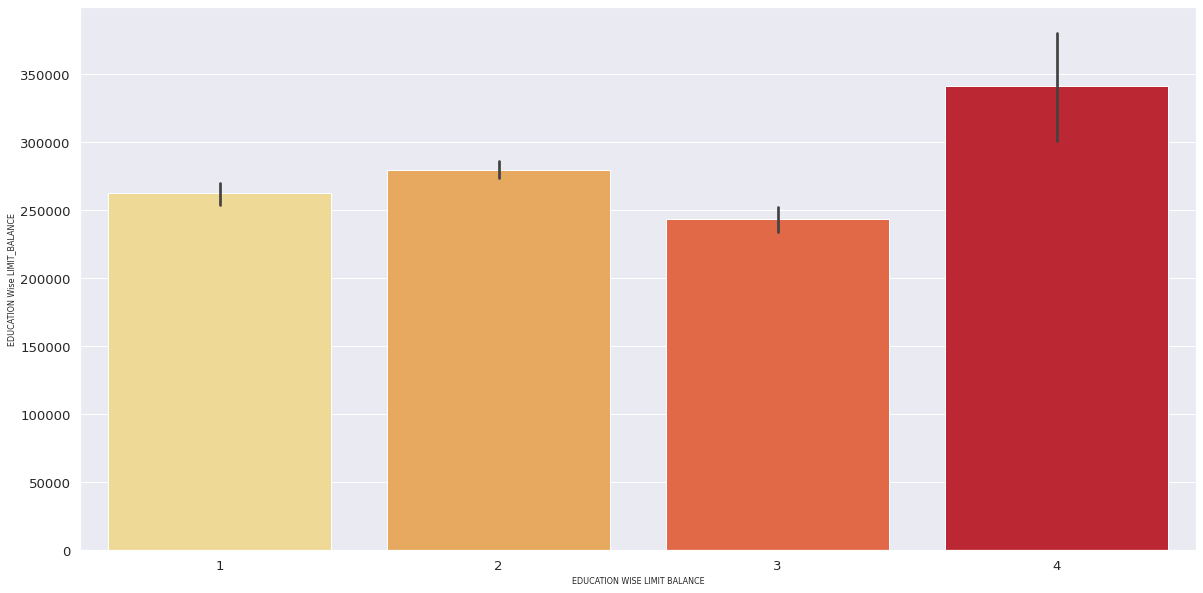

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['EDUCATION'],df['Total_Bill'],palette ='YlOrRd')
plt.ylabel('EDUCATION Wise LIMIT_BALANCE',fontdict={'fontsize':8})
plt.xlabel('EDUCATION WISE LIMIT BALANCE',fontdict={'fontsize':8})

# MARRIAGE

In [ ]:
df.value_counts('MARRIAGE')

MARRIAGE
2    15922
1    13434
3      318
0       54
dtype: int64

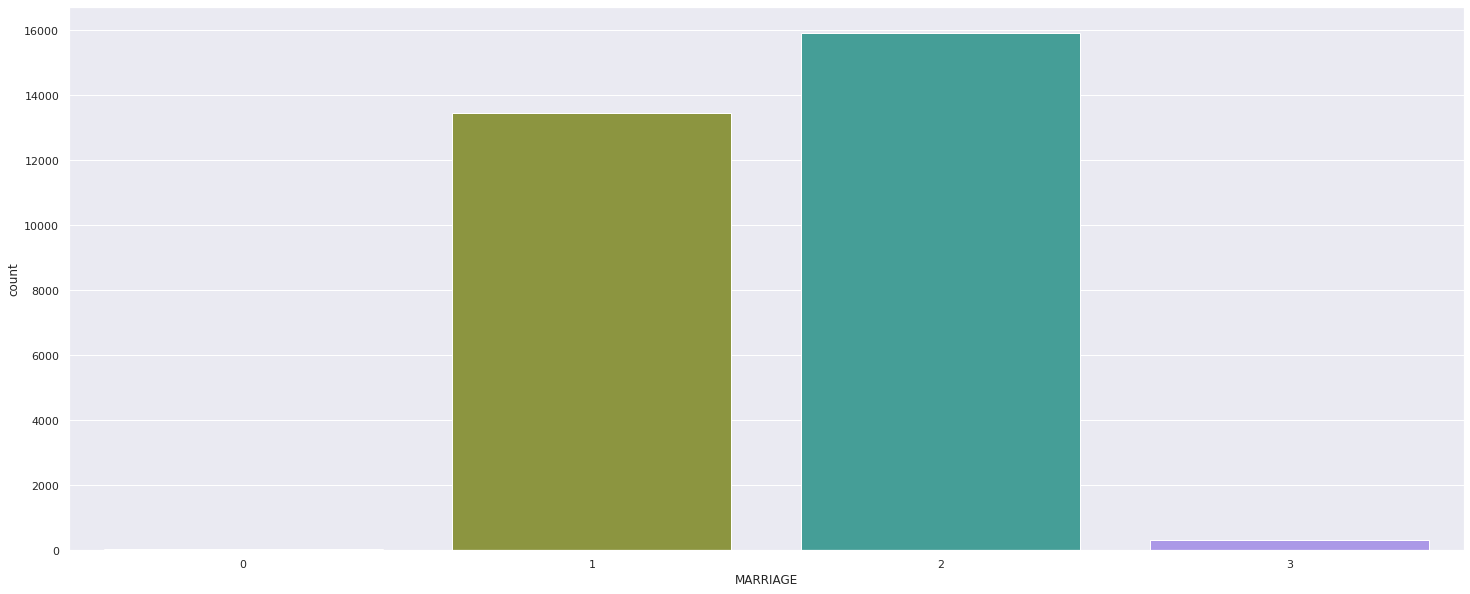

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(df['MARRIAGE'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()

# Marital status (1 = married; 2 = single; 3 = others) There is not mention 0 refers to so i have merge 0 in the 3 refers to others which are may be Divorced

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15922
1    13434
3      372
Name: MARRIAGE, dtype: int64

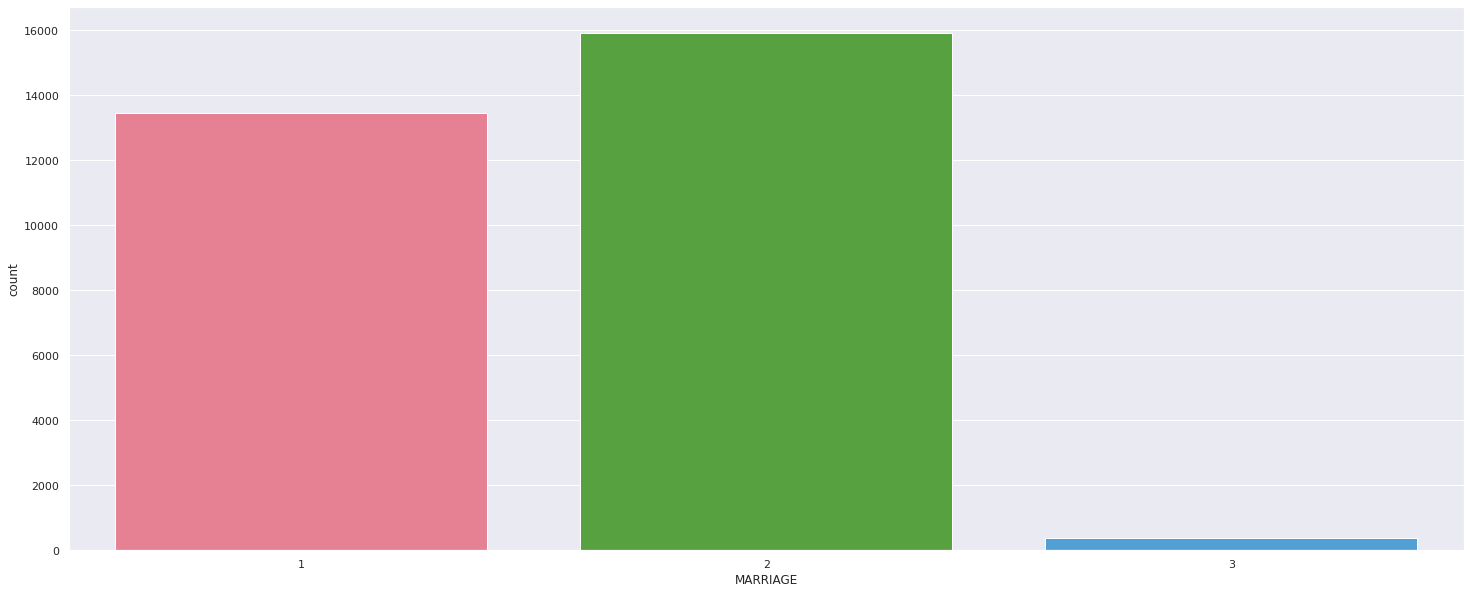

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(df['MARRIAGE'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()

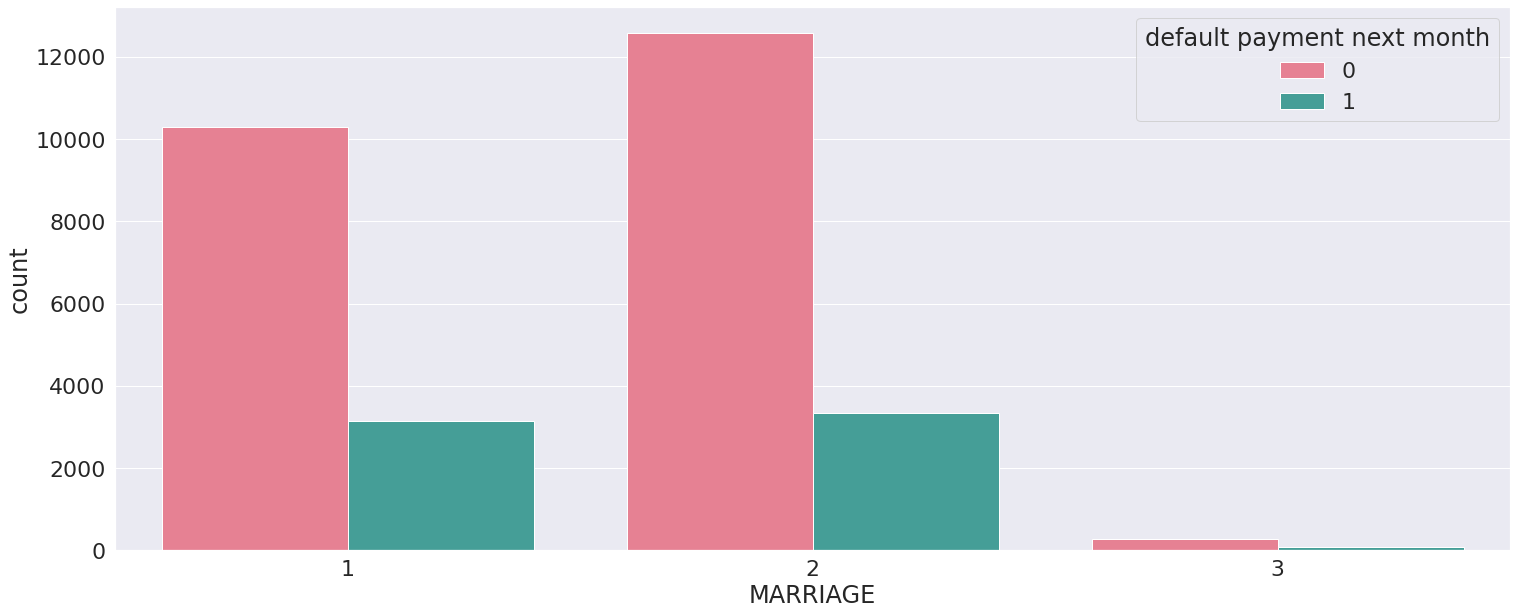

In [ ]:
sns.countplot(x=df['MARRIAGE'],hue=df['default payment next month'], palette='husl')
plt.rcParams['figure.figsize'] = (18, 5)

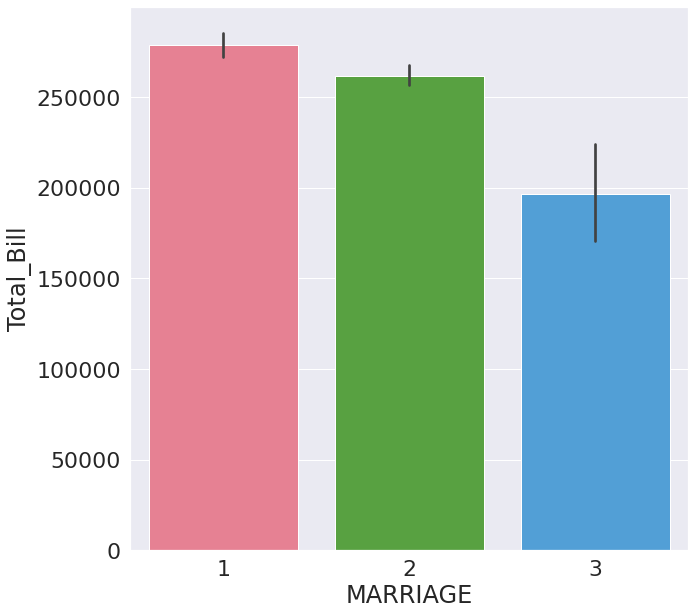

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(df['MARRIAGE'],df['Total_Bill'],palette='husl')
plt.show()

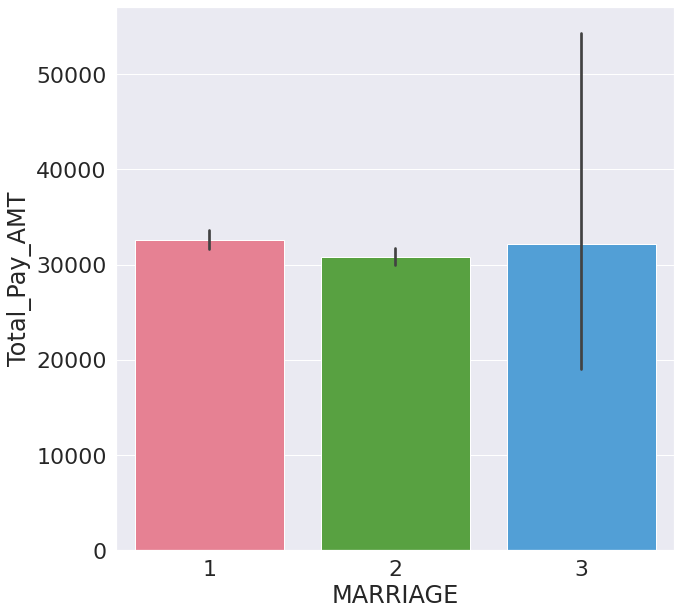

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(df['MARRIAGE'],df['Total_Pay_AMT'],palette='husl')
plt.show()

# Most of the credit card users in the Dataset are singles
# Married people are more likely to pay their default payments compared to singles and others
# And also I can say that married people had generated more bills than singles and others and also as compared to single peoples that married peoples had more pay_AMT.


# LETS CHECK GENDER

In [ ]:
df.rename(columns = {'SEX':'GENDER'}, inplace = True)

In [ ]:
df['GENDER'].unique()

array([2, 1])

In [ ]:
df.value_counts('GENDER')

GENDER
2    17989
1    11739
dtype: int64

Text(0.5, 1.0, 'GENDER PERCENTAGE')

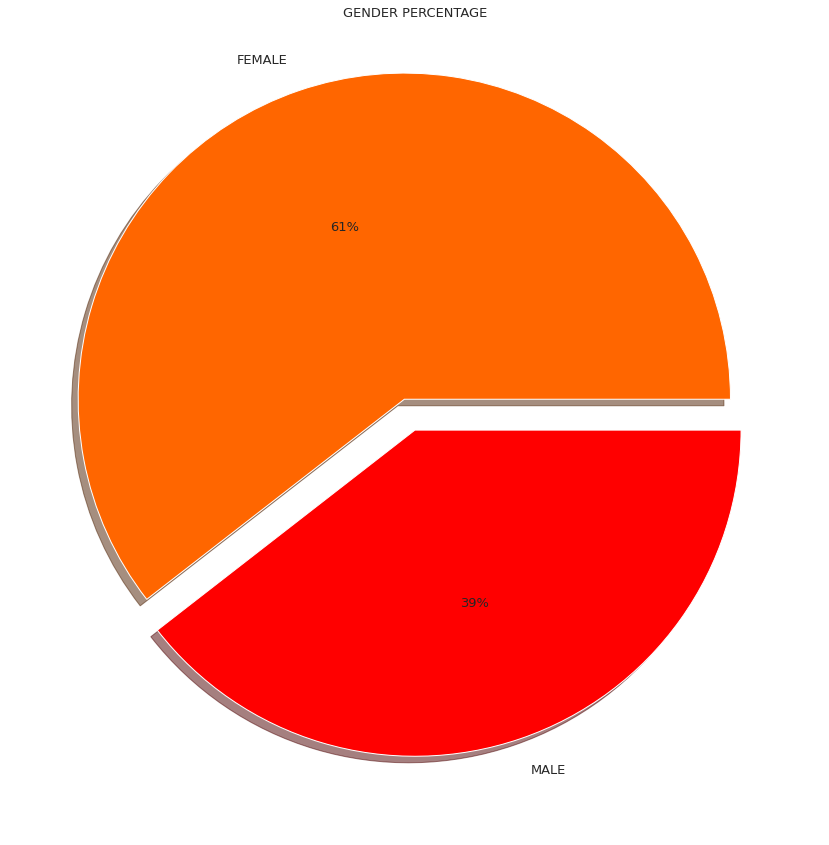

In [ ]:
# Creating a pie chart for GENDER
plt.figure(figsize = (25,15))
plt.pie(df['GENDER'].value_counts(),radius=1, autopct='%2.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['FEMALE','MALE'],explode = [0.1, 0],
        shadow=True,colors=['#FF6600','#FF0000'])
plt.title('GENDER PERCENTAGE',fontdict={'size':13})

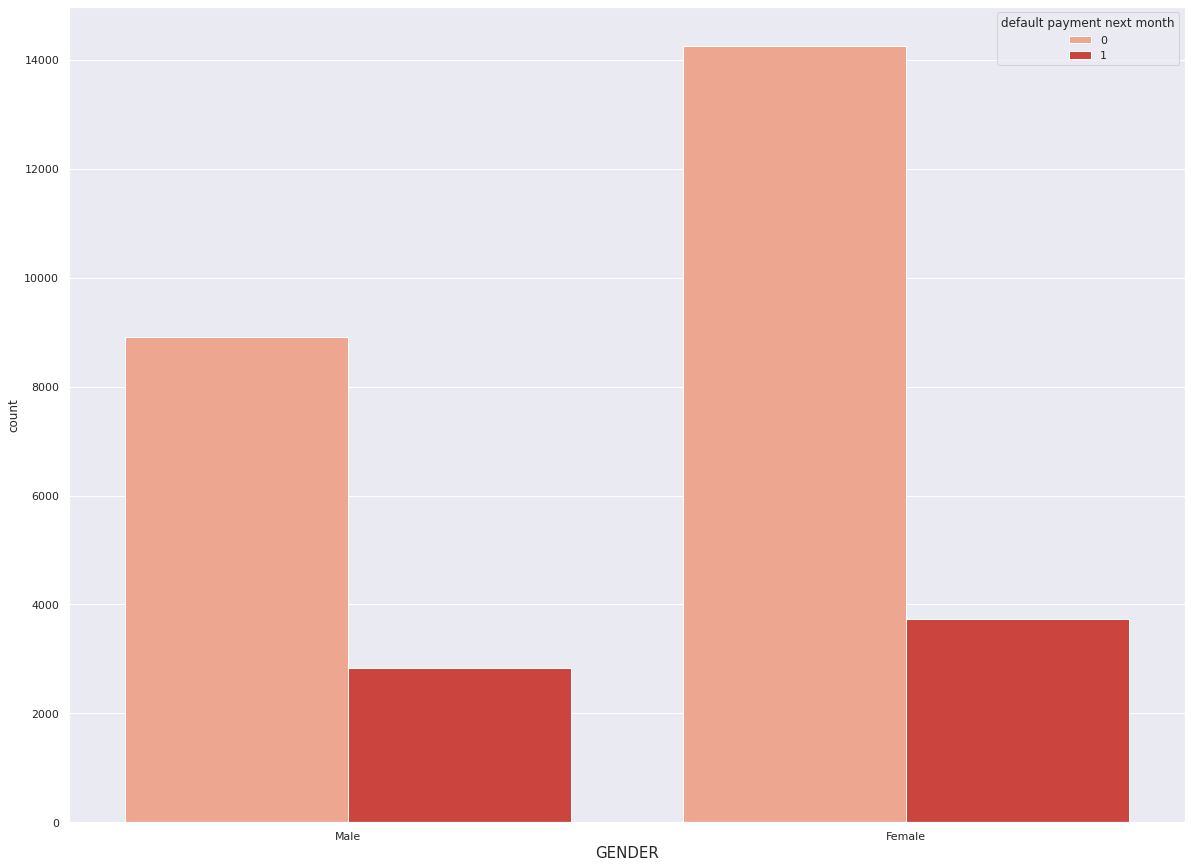

In [ ]:
sns.countplot(x=df['GENDER'],hue=df['default payment next month'],palette ='Reds')
plt.xticks(ticks=range(2),labels=['Male','Female'])
plt.xlabel('GENDER',fontdict={'size':15})
plt.rcParams['figure.figsize'] = (20, 15)

Text(0.5, 0, 'GENDER')

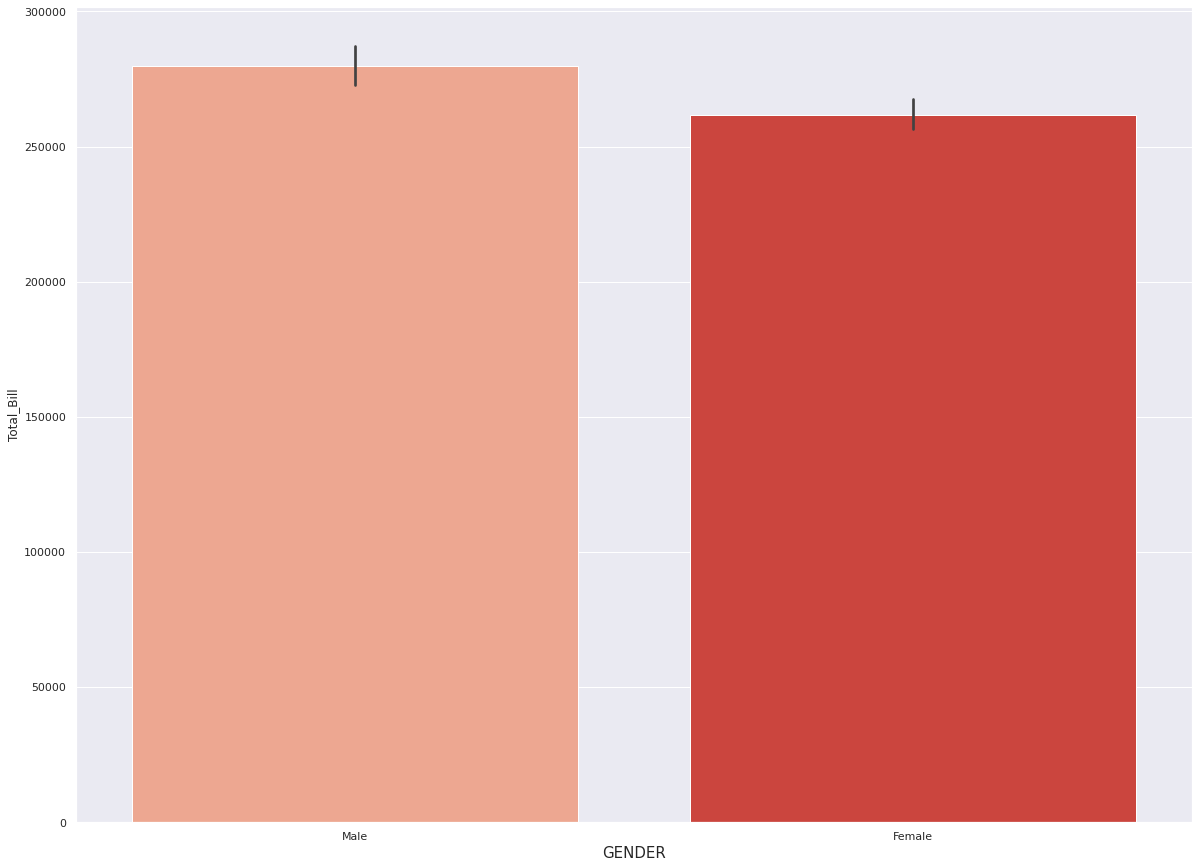

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(df['GENDER'],df['Total_Bill'],palette='Reds')
plt.xticks(ticks=range(2),labels=['Male','Female'])
plt.xlabel('GENDER',fontdict={'size':15})

Text(0.5, 0, 'GENDER')

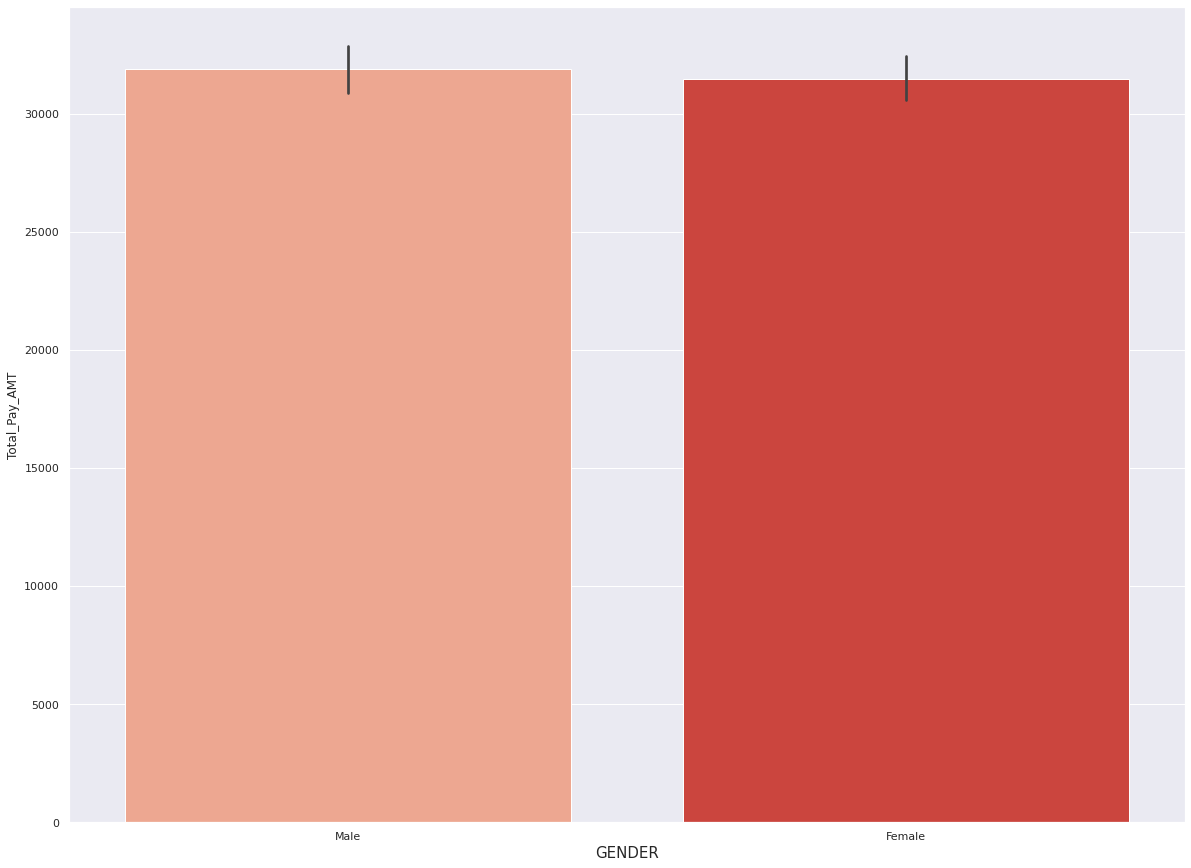

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(df['GENDER'],df['Total_Pay_AMT'],palette='Reds')
plt.xticks(ticks=range(2),labels=['Male','Female'])
plt.xlabel('GENDER',fontdict={'size':15})

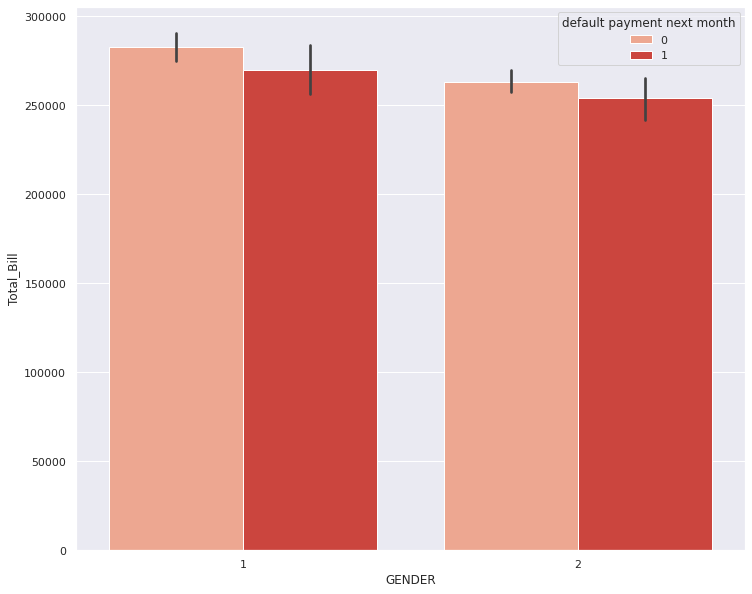

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(df["GENDER"],df["Total_Bill"],df["default payment next month"],palette='Reds')
plt.show()

# The Number of females are much more than males in the dataset
# Also mostly females are going to be default next month but if we see males are also going to be default as near as females although having less credit card users
# Males have generated more bill than females

# AGE

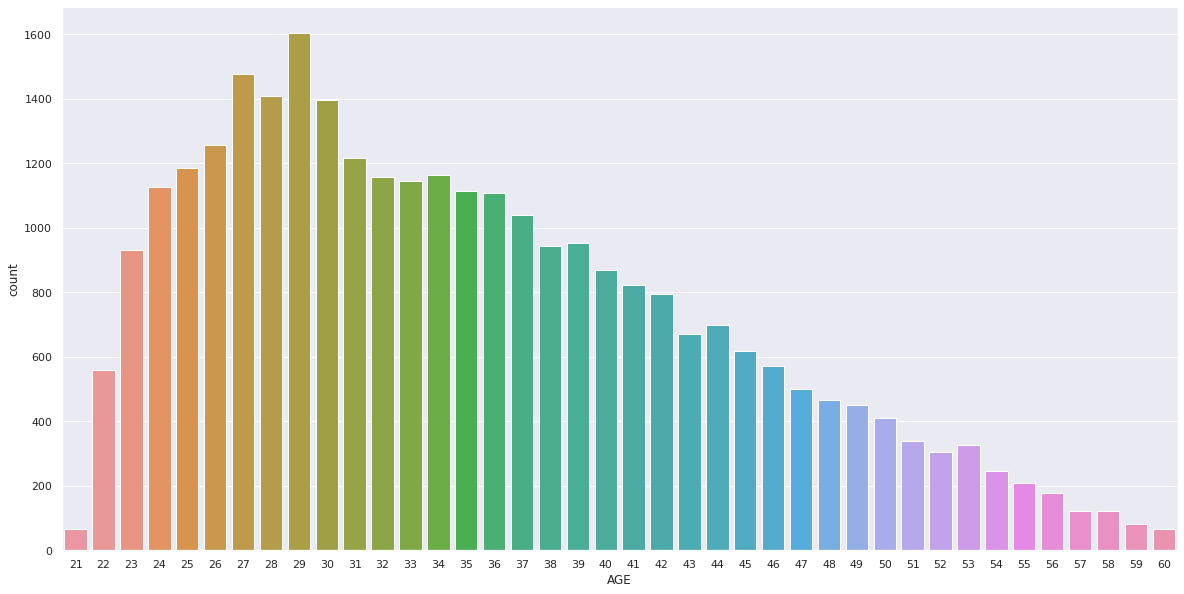

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df.AGE)
plt.show()

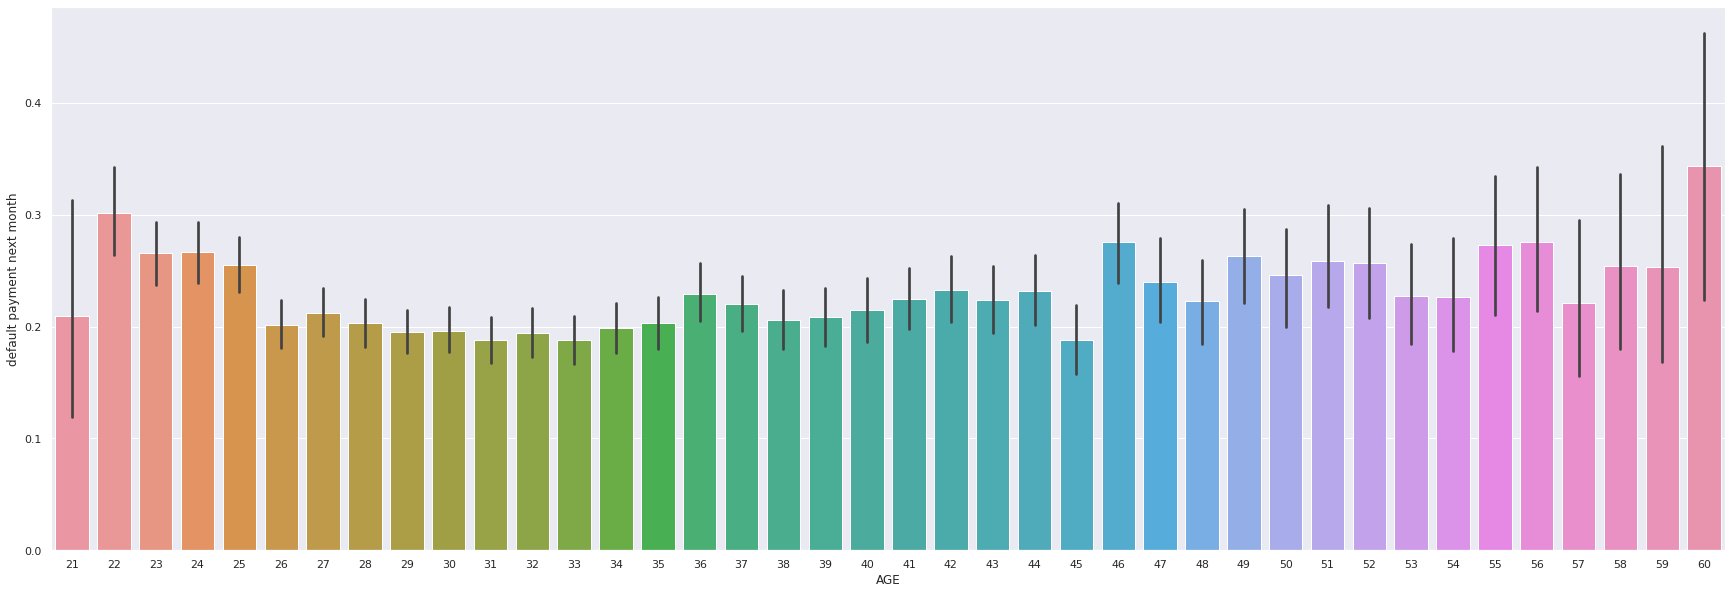

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(df['AGE'],df['default payment next month'])
plt.show()

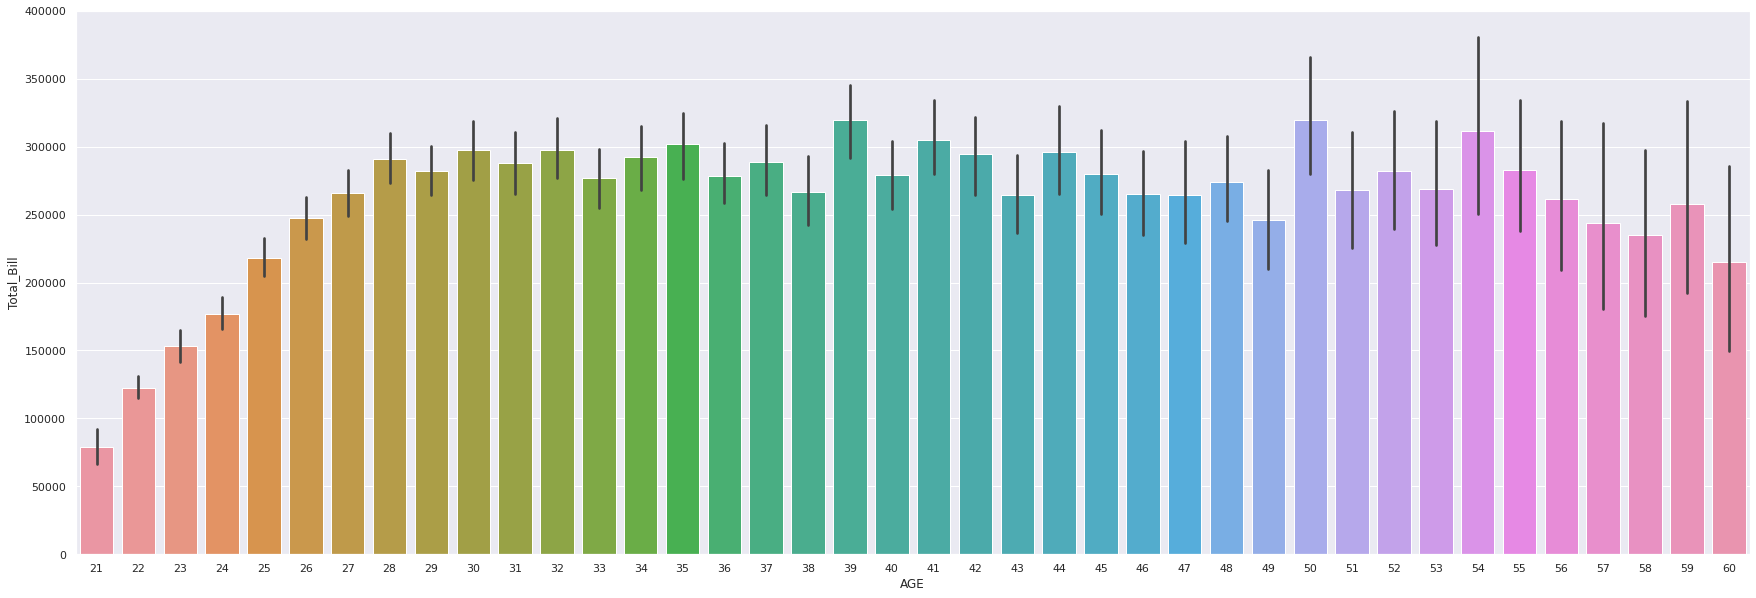

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(df['AGE'],df['Total_Bill'])
plt.show()

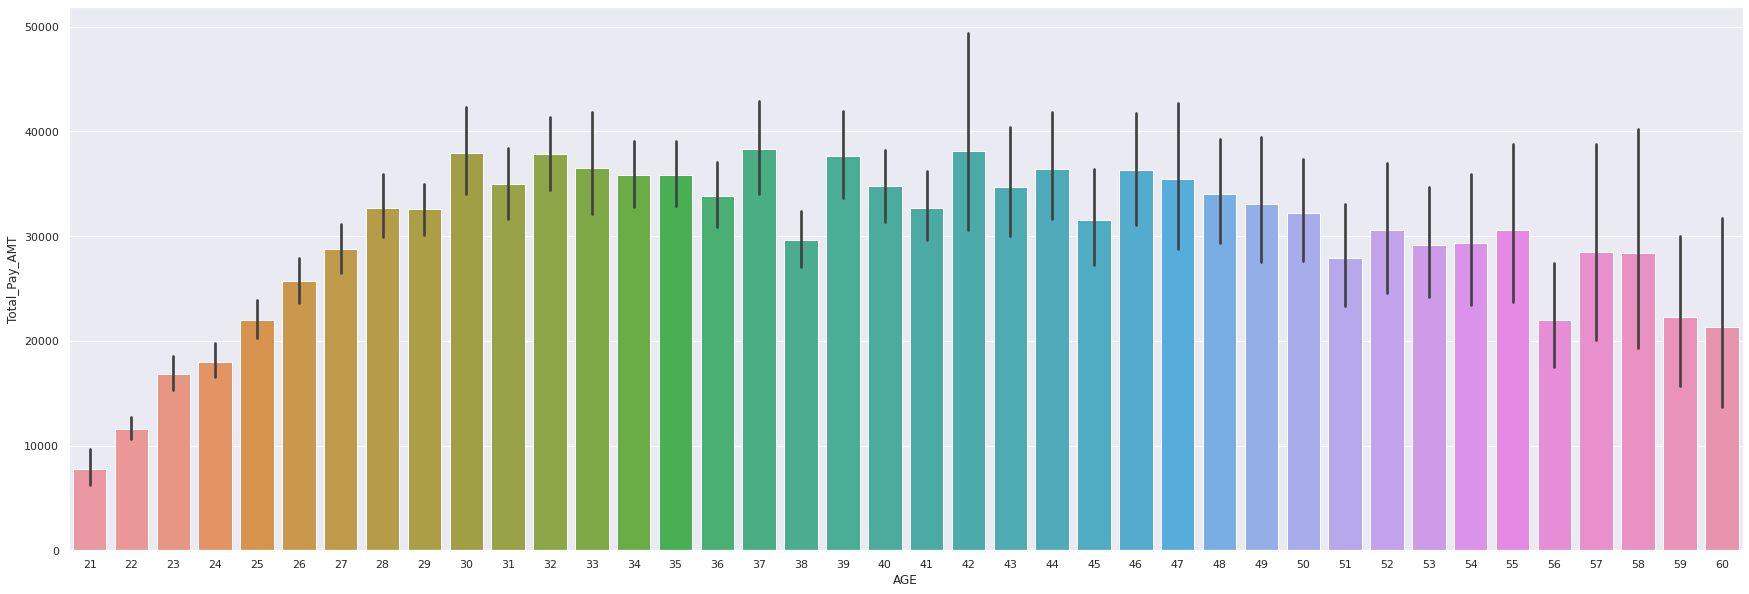

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(df['AGE'],df['Total_Pay_AMT'])
plt.show()

Text(0.5, 0, 'Age in years')

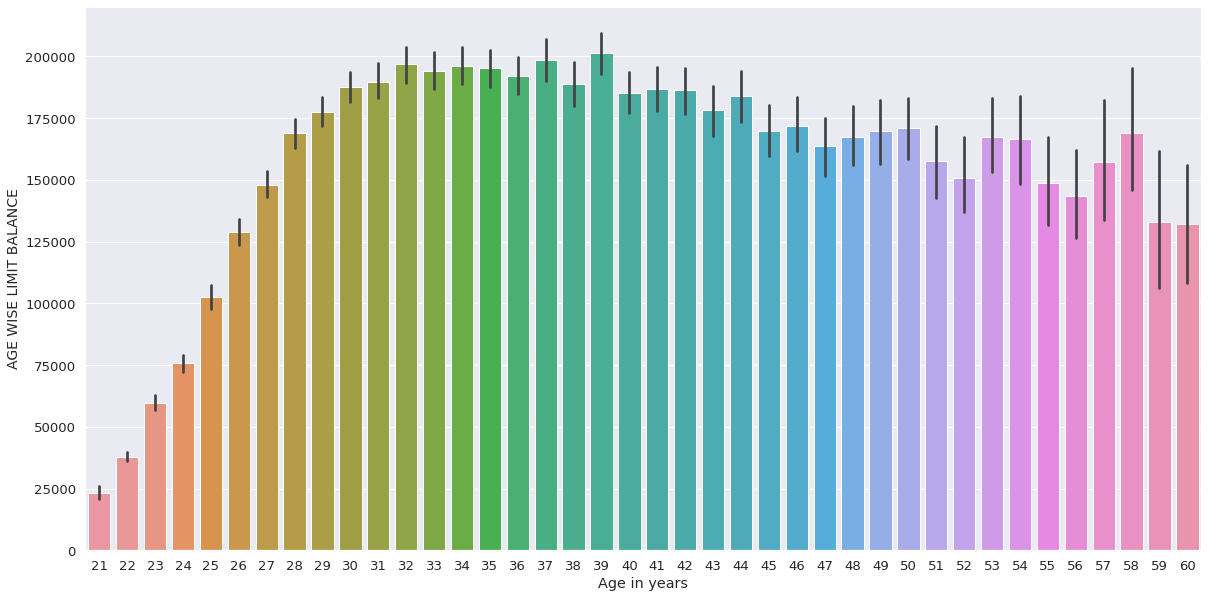

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['AGE'],df['LIMIT_BAL'])
plt.ylabel('AGE WISE LIMIT BALANCE',fontdict={'fontsize':14})
plt.xlabel('Age in years')

Text(0.5, 1.0, 'LIMIT BALANCE HISTOGRAM')

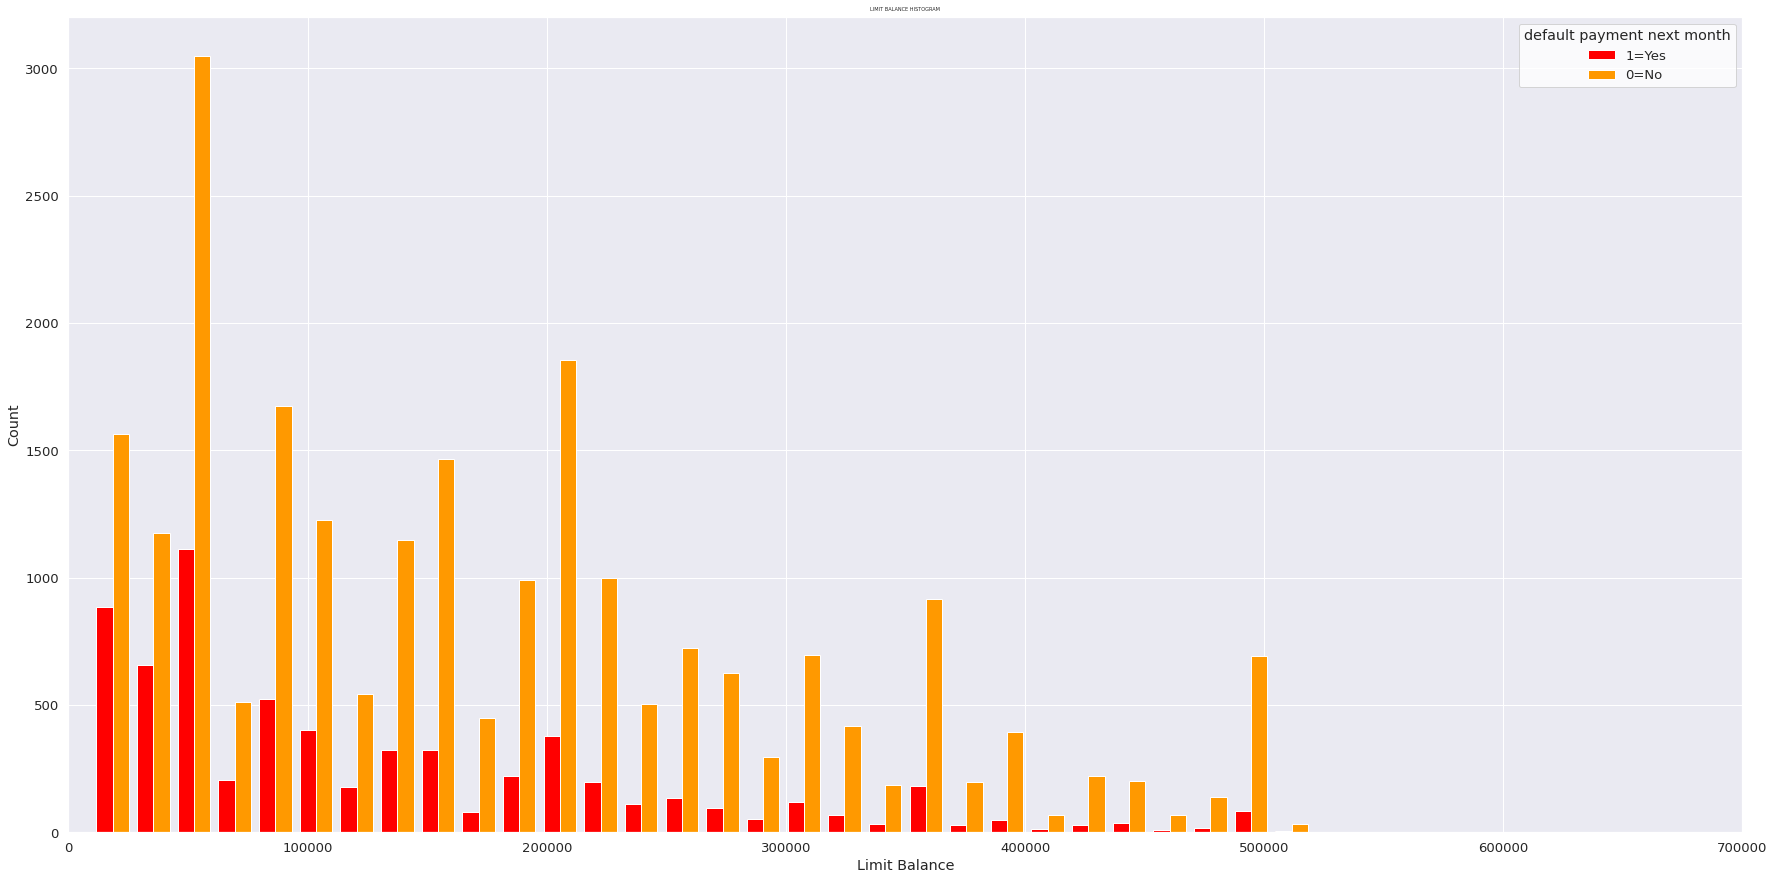

In [ ]:
Defaulters = list(df[df['default payment next month'] == 1]['LIMIT_BAL'])
Non_Defaulters = list(df[df['default payment next month'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(30,15))
sns.set_context('notebook', font_scale=1.2)#sns.set_color_code
plt.hist([Defaulters, Non_Defaulters], bins = 30, color=['#FF0000','#FF9900'])
plt.xlim([0,700000]) #set balance limit
plt.legend(['1=Yes', '0=No'], title = 'default payment next month', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.title('LIMIT BALANCE HISTOGRAM', SIZE=5)

# more the limit bal more the chances of getting default

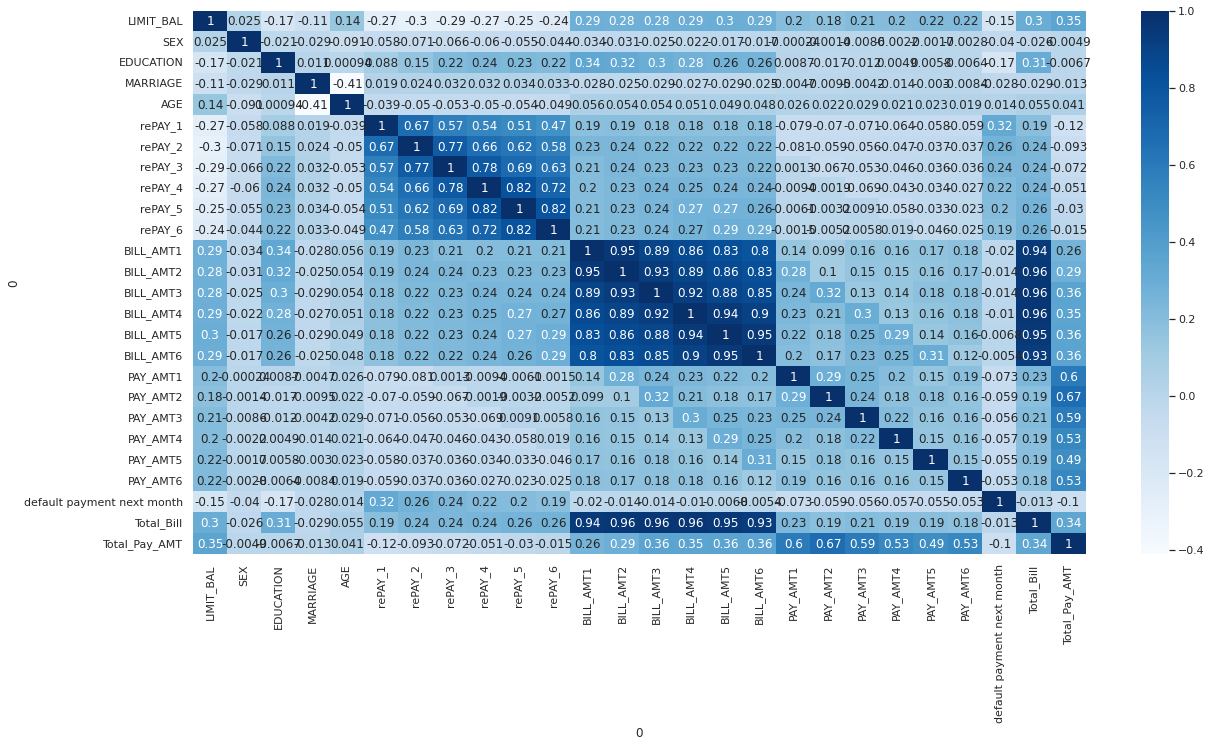

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="Blues")

In [ ]:
df_new = df.drop(['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1',
                  'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1)

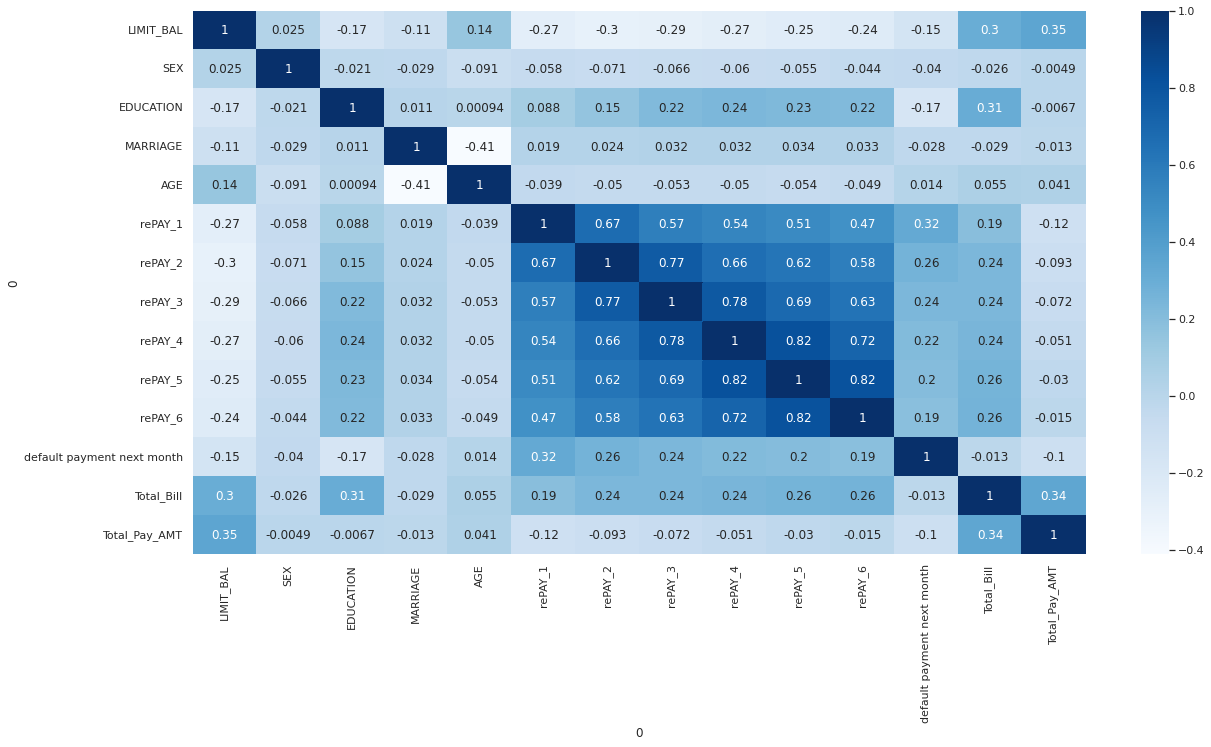

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),annot=True, cmap="Blues")

# **One Hot Encoding**

In [ ]:
# Encoding Education and Marriage since both are caategorical variables
df_new = pd.get_dummies(columns = ['EDUCATION','MARRIAGE'], data = df_new,drop_first=True)

In [ ]:
df_new

,LIMIT_BAL,GENDER,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,default payment next month,Total_Bill,Total_Pay_AMT,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
1,20000,2,24,2,2,-1,-1,-2,-2,1,7704,689,1,0,0,0,0
2,120000,2,26,-1,2,0,0,0,2,1,17077,5000,1,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,0,101653,11018,1,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,0,231334,8388,1,0,0,0,0
5,50000,1,57,-1,0,-1,0,0,0,0,109339,59049,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,0,725349,42550,0,1,0,0,0
29997,150000,1,43,-1,-1,-1,-1,0,0,0,21182,14490,0,1,0,1,0
29998,30000,1,37,4,3,2,-1,0,0,1,70496,31300,1,0,0,1,0
29999,80000,1,41,1,-1,0,0,0,-1,1,266611,147181,0,1,0,0,0


# **Checking Class Imbalance**

([<matplotlib.axis.XTick at 0x7f974e3d5af0>,
 [Text(0, 0, 'Not Defaulter'), Text(0, 0, 'Defaulter')])

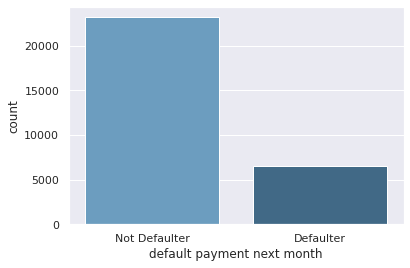

In [ ]:
sns.countplot(df_new['default payment next month'],palette ='Blues_d')
plt.xticks(ticks=range(2),labels=['Not Defaulter','Defaulter'])

# Handling Class Imbalance

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29728 entries, 1 to 30000
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29564 non-null  float64
 1   GENDER                      29728 non-null  int64  
 2   AGE                         29728 non-null  int64  
 3   rePAY_1                     29728 non-null  int64  
 4   rePAY_2                     29728 non-null  int64  
 5   rePAY_3                     29728 non-null  int64  
 6   rePAY_4                     29728 non-null  int64  
 7   rePAY_5                     29728 non-null  int64  
 8   rePAY_6                     29728 non-null  int64  
 9   default payment next month  29728 non-null  int64  
 10  Total_Bill                  29728 non-null  int64  
 11  Total_Pay_AMT               29728 non-null  int64  
 12  EDUCATION_2                 29728 non-null  uint8  
 13  EDUCATION_3                 297

In [ ]:
# Splitting the dataset into dependent and independent variables.Here x=dependent variables and y=dependent variables
x = df_new.drop('default payment next month',axis=1)
y = df_new['default payment next month']

In [ ]:
smt = SMOTE()

In [ ]:
# Using Smote for handling data imbalance
X_sm, Y_sm = smt.fit_resample(x,y)


In [ ]:
Y_sm.value_counts()

1    23165
0    23165
Name: default payment next month, dtype: int64

# **STANDARDIZATION OF DATA**

In [ ]:
# Standard Scaler for scaling the data
scale = StandardScaler()
x_std = scale.fit_transform(X_sm)

# **Training and Testing on Datasets**

In [ ]:
# Train-Test Split for splitting the dataset into training and validation sets
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_std,Y_sm,test_size=0.2)

# **Implementing Models**

# **Logistic Regression**

In [ ]:
# Training Logistic Regression model
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Predicting using our trained Logistic regression model
y_pred_test = LR.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of Logistic Regression model is: 74.33628318584071


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [ ]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4768
           1       0.73      0.75      0.74      4498

    accuracy                           0.74      9266
   macro avg       0.74      0.74      0.74      9266
weighted avg       0.74      0.74      0.74      9266

[[3536 1146]
 [1232 3352]]


In [ ]:
recall_score(y_test, y_pred_test)

0.731239092495637

# **Support Vector Classifier**

In [ ]:
svc =SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [ ]:
y_pred_test = svc.predict(x_test)

In [ ]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      5029
           1       0.73      0.79      0.76      4237

    accuracy                           0.77      9266
   macro avg       0.77      0.78      0.77      9266
weighted avg       0.78      0.77      0.77      9266

[[3809  873]
 [1220 3364]]


In [ ]:
recall_score(y_test, y_pred_test)

0.7338568935427574

# **Random Forest Classifier**

In [ ]:
# Training Random Forest Classifier Model
RFC = RandomForestClassifier(n_estimators = 100,random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting using our trained Random Forest Classifier model
y_pred_test = RFC.predict(x_test)

In [ ]:
print("Accuracy of RandomForestClassifier model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of RandomForestClassifier model is: 82.58148068206346


In [ ]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      4856
           1       0.80      0.84      0.82      4410

    accuracy                           0.83      9266
   macro avg       0.83      0.83      0.83      9266
weighted avg       0.83      0.83      0.83      9266

[[3962  720]
 [ 894 3690]]


In [ ]:
recall_score(y_test, y_pred_test)

0.8049738219895288

# **XGBoost Classifier**

In [ ]:
# Training Linear Regression Model
xgb_clf=xgb.XGBClassifier(max_depth=5,learning_rate=0.3,n_jobs=-1,random_state=42)
xgb_clf.fit(x_train,y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_jobs=-1, random_state=42)

In [ ]:
# Predicting using our trained Random Forest Classifier model
y_pred_test = xgb_clf.predict(x_test)

In [ ]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      5024
           1       0.77      0.83      0.80      4242

    accuracy                           0.81      9266
   macro avg       0.81      0.81      0.81      9266
weighted avg       0.81      0.81      0.81      9266

[[3971  711]
 [1053 3531]]


In [ ]:
recall_score(y_test, y_pred_test)

0.7702879581151832